# Análise da Survey

Código para a análise dos resultados da survey.

# Base FII tratada

Importa os pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # For statistical tests

Base de dados tratada.
Documento disponível em: https://docs.google.com/spreadsheets/d/1tZ0Q9cJ_fKy9nPc7GnswIWZzcvkPET6C/edit?usp=sharing&ouid=111994440546225958106&rtpof=true&sd=true

In [ ]:
df_t = pd.read_excel("/content/Survey - FII_tratada.xlsx")

<Axes: >

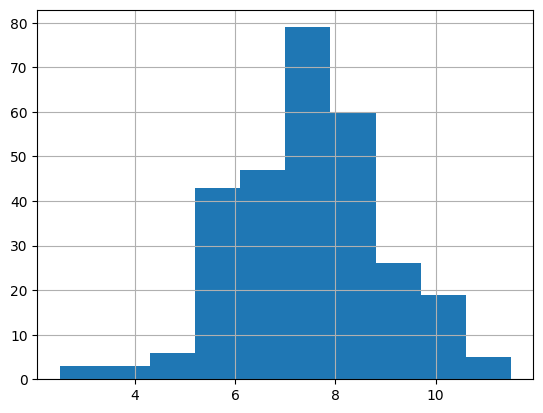

In [ ]:
df_t['FII'].hist()

<Axes: >

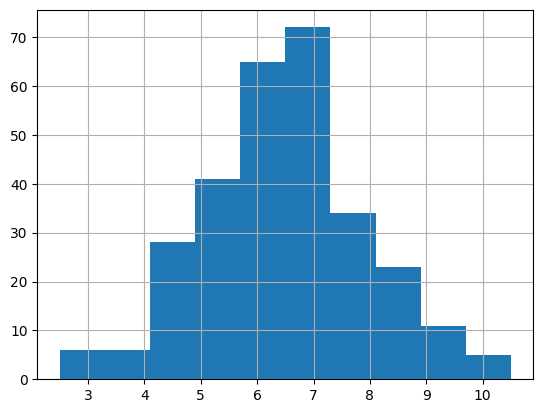

In [ ]:
df_t['FII2'].hist()

<Axes: >

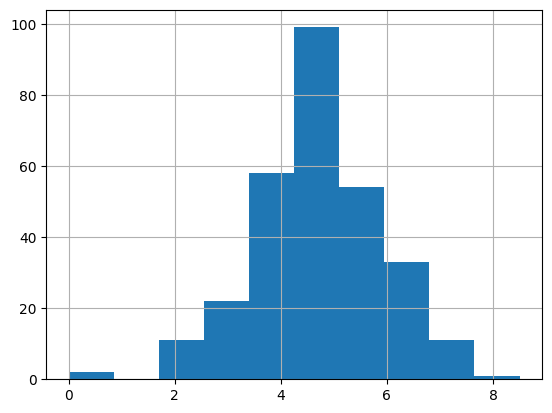

In [ ]:
df_t['TFI'].hist()

<Axes: >

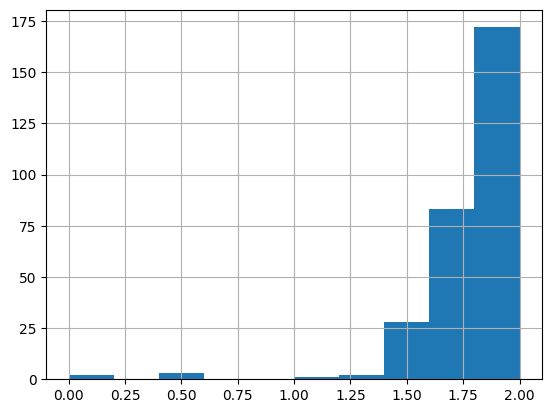

In [ ]:
df_t['DFI'].hist()

<Axes: >

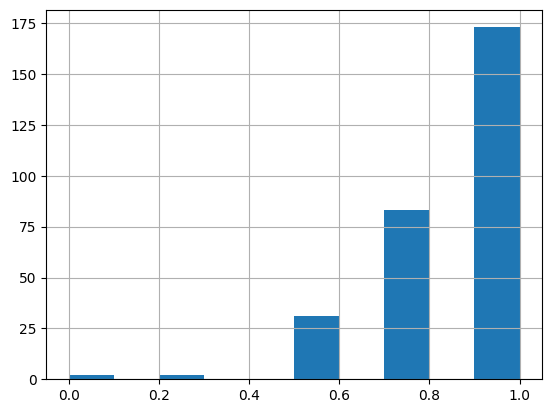

In [ ]:
df_t['DFI2'].hist()

<Axes: >

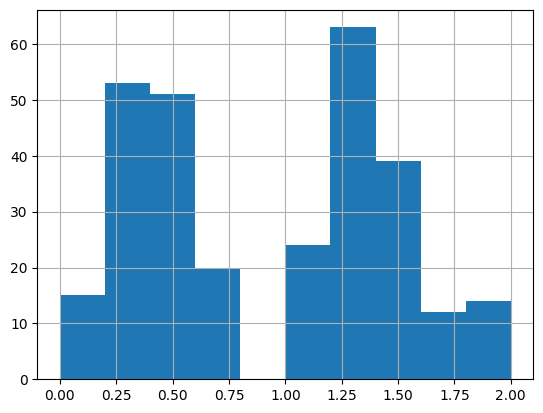

In [ ]:
df_t['IFI'].hist()

In [ ]:
df_t.describe()

,FII,FII2,TFI,DFI,DFI2,IFI,Idade,conta_digital_01,emprestimo_banco_01,emprest_amigo_01,cartao_debito_01,cartao_credito,boleto_01,cheque_01,cart_ debito_01,cart_credito_01,DOC_TED_01,Pix_01,dinheiro_01,pagamento_convenio_01
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,7.434708,6.455326,4.684708,1.842784,0.863402,0.907216,36.735395,0.979381,0.426117,0.484536,0.941581,0.883162,0.491409,0.087629,0.651203,0.762027,0.263746,0.863402,0.422680,0.177835
std,1.486154,1.449934,1.219644,0.274615,0.191480,0.559387,13.427279,0.142348,0.495363,0.500622,0.234939,0.321781,0.271354,0.181141,0.314023,0.291151,0.229843,0.191480,0.267558,0.242896
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,5.500000,4.000000,1.750000,0.750000,0.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.000000,0.500000,0.750000,0.000000,0.750000,0.250000,0.000000
50%,7.250000,6.250000,4.750000,2.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.750000,0.750000,0.250000,1.000000,0.500000,0.000000
75%,8.375000,7.375000,5.500000,2.000000,1.000000,1.250000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.000000,1.000000,1.000000,0.500000,1.000000,0.500000,0.250000
max,11.500000,10.500000,8.500000,2.000000,1.000000,2.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Define ORDER for categories
order = {
    'Escolaridade': [
        'Up to High School',
        'Incomplete Higher Education',
        'Completed Higher Education',
        'Incomplete Postgraduate',
        'Completed Postgraduate'
    ],
    'Renda_media_familiar': [
        'Prefer not to say'
        'Up to 2k',
        '2,001-3,000',
        '3,001-5,000',
        '5,001-10,000',
        '10,001-20,000',
        '20k+'
    ],
    'Estado_UF': [
        'São Paulo',
        'Minas Gerais',
        'UF_SE',
        'UF_S',
        'UF_N_NE_CO'
    ]
    # Add other variables as needed
}

In [ ]:
df_t['Sexo'] = df_t['Sexo'].map({'Mulher': 'Woman', 'Homem': 'Man'})
df_t['Raça'] = df_t['Raça'].map({'Branca': 'White', 'Preta': 'Black', 'Parda': 'Brown', 'Amarela': 'Yellow'})
df_t['Escolaridade'] = df_t['Escolaridade'].map({'Ensino superior completo': 'Completed Higher Education', 'Ensino superior incompleto': 'Incomplete Higher Education', 'Pós-graduação completa': 'Completed Postgraduate', 'Pós-graduação incompleta': 'Incomplete Postgraduate', 'EM' : 'Up to High School'})
df_t['Renda_media_familiar'] = df_t['Renda_media_familiar'].map({'20k+': '20k+', 'Prefiro não dizer': 'Prefer not to say', 'ate_2k': 'Up to 2k', '2.001,00 a 3.000,00': '2,001-3,000', '3.001,00 a 5.000,00': '3,001-5,000', '5.001,00 a 10.000,00' : '5,001-10,000', '10.001,00 a 20.000,00': '10,001-20,000'})


In [ ]:
df_t

,FII,FII2,TFI,DFI,DFI2,IFI,Idade,Sexo,Raça,Escolaridade,...,cart_credito,cart_credito_01,DOC_TED,DOC_TED_01,Pix_freq,Pix_01,dinheiro,dinheiro_01,pagamento_convenio,pagamento_convenio_01
0,6.25,5.25,4.00,2.00,1.00,0.25,26,Woman,Yellow,Incomplete Postgraduate,...,Algumas vezes,0.50,Raramente,0.25,Sempre,1.00,Raramente,0.25,Não uso,0.00
1,5.00,4.00,2.75,2.00,1.00,0.25,26,Woman,White,Completed Postgraduate,...,Não uso,0.00,Raramente,0.25,Sempre,1.00,Raramente,0.25,Raramente,0.25
2,8.50,7.50,6.25,2.00,1.00,0.25,26,Woman,Brown,Incomplete Postgraduate,...,Sempre,1.00,Raramente,0.25,Sempre,1.00,Raramente,0.25,Raramente,0.25
3,7.50,6.50,5.50,1.75,0.75,0.25,34,Man,Yellow,Completed Higher Education,...,Normalmente,0.75,Algumas vezes,0.50,Normalmente,0.75,Raramente,0.25,Raramente,0.25
4,10.00,9.00,6.75,2.00,1.00,1.25,57,Man,Yellow,Completed Postgraduate,...,Normalmente,0.75,Algumas vezes,0.50,Sempre,1.00,Raramente,0.25,Algumas vezes,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,7.25,6.25,4.00,2.00,1.00,1.25,25,Man,White,Completed Higher Education,...,Normalmente,0.75,Não uso,0.00,Sempre,1.00,Raramente,0.25,Raramente,0.25
287,7.75,6.75,4.50,2.00,1.00,1.25,26,Man,White,Incomplete Postgraduate,...,Normalmente,0.75,Raramente,0.25,Sempre,1.00,Raramente,0.25,Não uso,0.00
288,5.75,4.75,4.25,1.50,0.50,0.00,28,Man,Yellow,Incomplete Postgraduate,...,Sempre,1.00,Algumas vezes,0.50,Algumas vezes,0.50,Não uso,0.00,Não uso,0.00
289,6.25,6.25,4.75,0.50,0.50,1.00,38,Man,Yellow,Completed Higher Education,...,Normalmente,0.75,Não uso,0.00,Algumas vezes,0.50,Sempre,1.00,Raramente,0.25


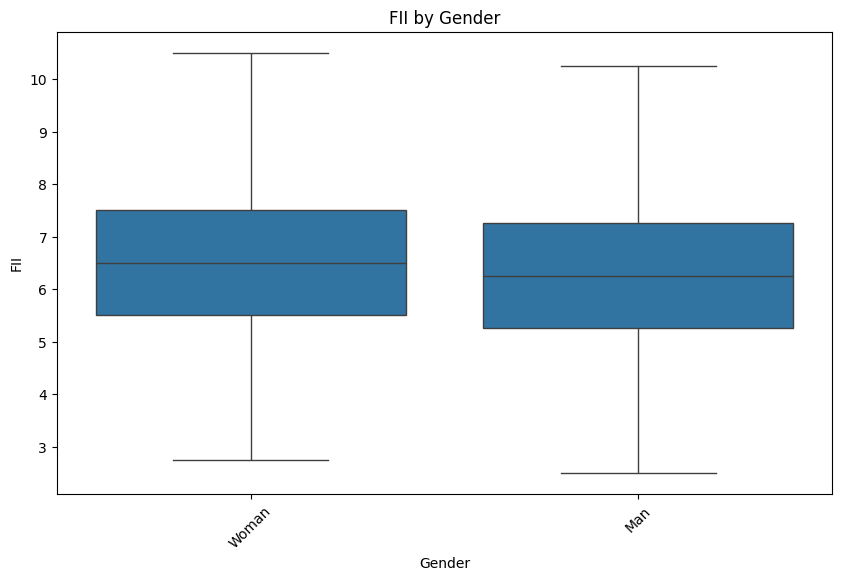

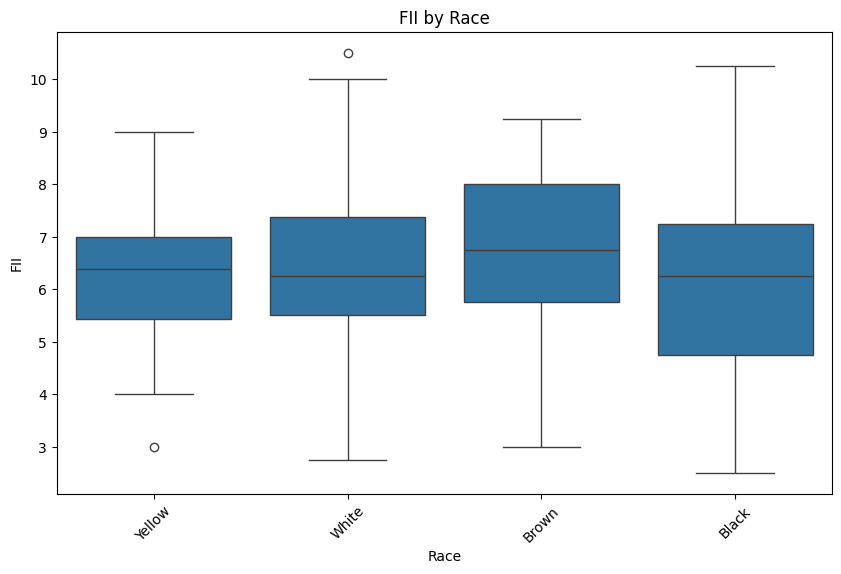

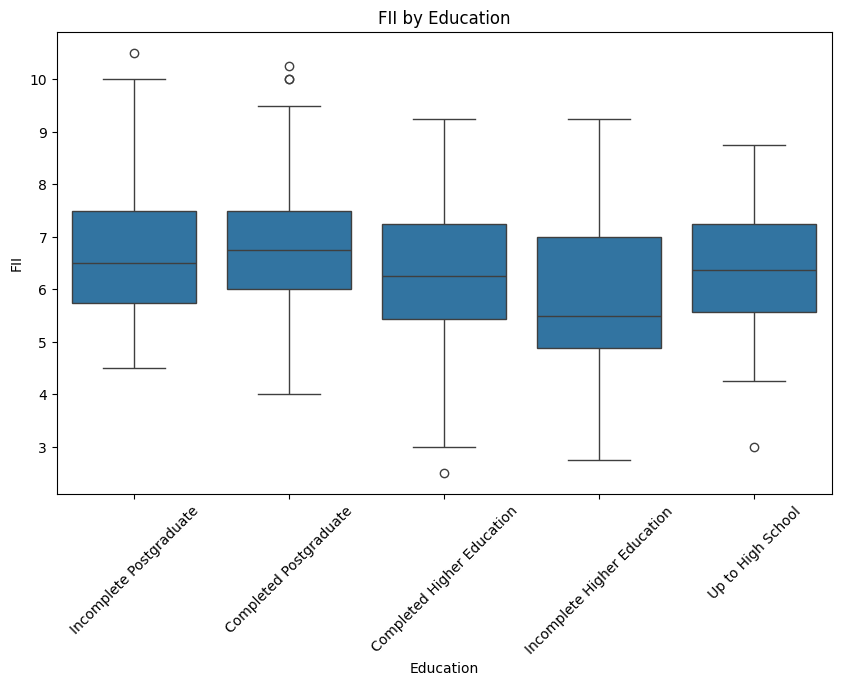

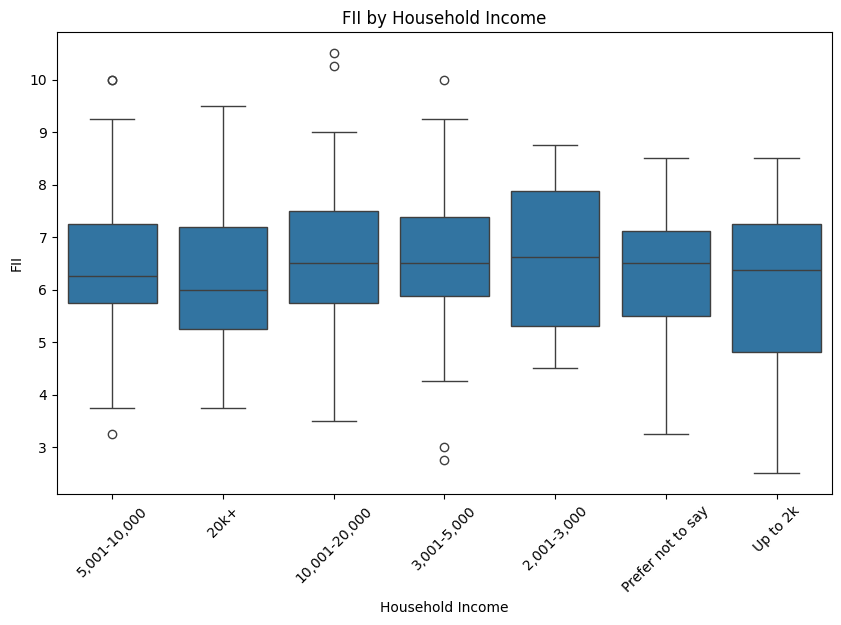

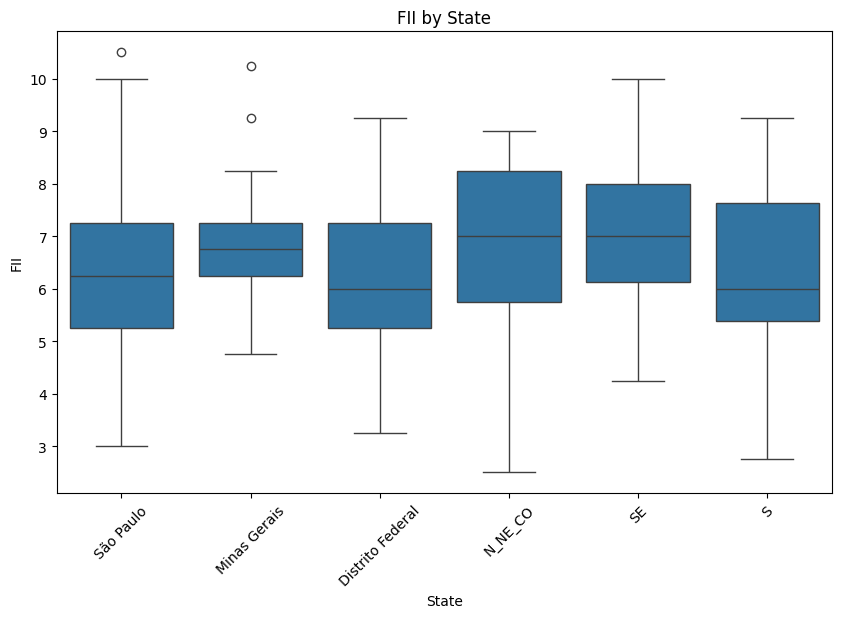

In [ ]:
# Distribution for relevant variables
translation_dict = {
    'Idade': 'Age',
    'Sexo': 'Gender',
    'Raça': 'Race',
    'Escolaridade': 'Education',
    'Renda_media_familiar': 'Household Income',
    'Estado_UF': 'State'
}

categorical_vars = ['Sexo', 'Raça', 'Escolaridade', 'Renda_media_familiar', 'Estado_UF']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='FII2', data=df_t)
    translated_var = translation_dict[var]  # Get the English name from the dictionary
    plt.title(f'FII by {translated_var}')  # Use translated variable in title
    plt.xlabel(translated_var)  # Replace Portuguese x-label with English
    plt.ylabel('FII')  # Rename y-axis label
    plt.xticks(rotation=45)
    plt.show()


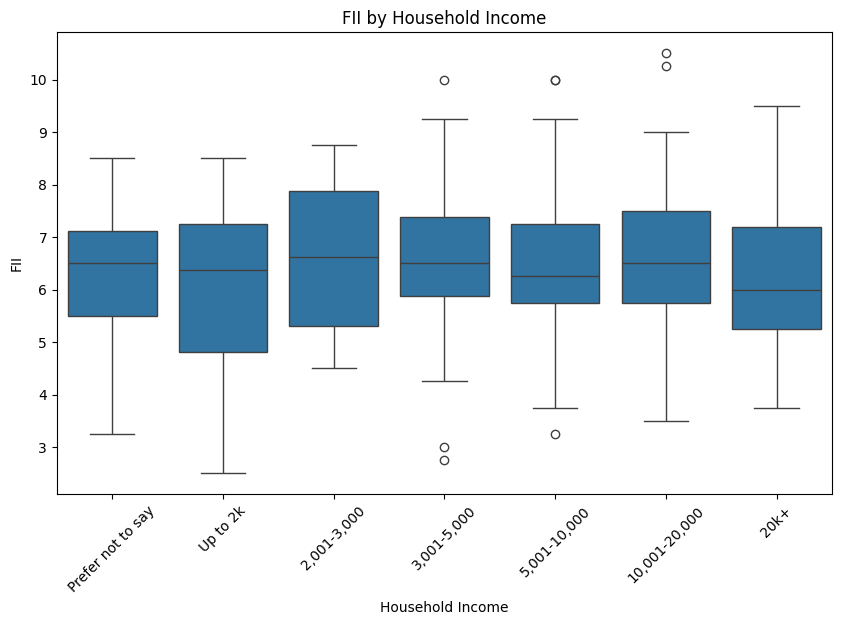

In [ ]:
# Renda_media_familiar em ordem
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Renda_media_familiar', y='FII2',
            order= ['Prefer not to say', 'Up to 2k', '2,001-3,000', '3,001-5,000', '5,001-10,000', '10,001-20,000', '20k+'],
            data=df_t)
translated_var = translation_dict['Renda_media_familiar']  # Get the English name from the dictionary
plt.title(f'FII by {translated_var}')  # Use translated variable in title
plt.xlabel(translated_var)  # Replace Portuguese x-label with English
plt.ylabel('FII')  # Rename y-axis label
plt.xticks(rotation=45)
plt.show()


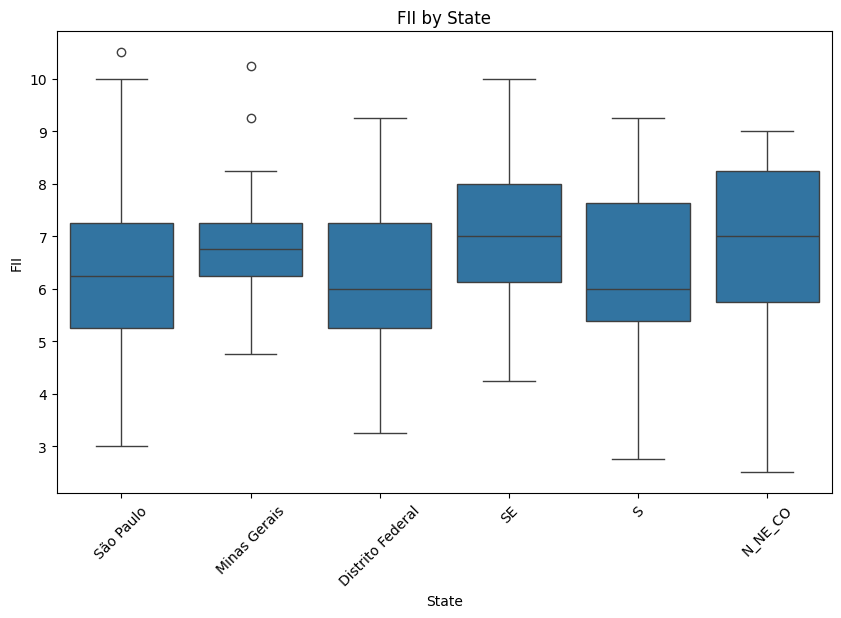

In [ ]:
# Estado_UF em ordem
plt.figure(figsize=(10, 6))
sns.boxplot(x=  'Estado_UF', y='FII2'
           ,order= ['São Paulo', 'Minas Gerais', 'Distrito Federal', 'SE', 'S', 'N_NE_CO']
           ,data=df_t)
translated_var = translation_dict['Estado_UF']  # Get the English name from the dictionary
plt.title(f'FII by {translated_var}')  # Use translated variable in title
plt.xlabel(translated_var)  # Replace Portuguese x-label with English
plt.ylabel('FII')  # Rename y-axis label
plt.xticks(rotation=45)
plt.show()

In [ ]:
# List of variables to include (adjust as needed)
relevant_vars2 = [
   'FII2', 'Idade', 'Sexo', 'Raça', 'Escolaridade', 'Renda_media_familiar', 'Estado_UF'
   ]

# Subset the DataFrame
df_t_subset = df_t[relevant_vars2]

In [ ]:
# List of categorical variables (excluding 'age' and 'FII')
categorical_vars = [
    'Sexo', 'Raça', 'Escolaridade', 'Renda_media_familiar', 'Estado_UF'
]

# One-hot encode (drop_first=True avoids multicollinearity)
df_t_encoded = pd.get_dummies(
    df_t_subset,
    columns=categorical_vars,
    drop_first=True
)

In [ ]:
df_t_encoded

,FII2,Idade,Sexo_Woman,Raça_Brown,Raça_White,Raça_Yellow,Escolaridade_Completed Postgraduate,Escolaridade_Incomplete Higher Education,Escolaridade_Incomplete Postgraduate,Escolaridade_Up to High School,...,Renda_media_familiar_20k+,"Renda_media_familiar_3,001-5,000","Renda_media_familiar_5,001-10,000",Renda_media_familiar_Prefer not to say,Renda_media_familiar_Up to 2k,Estado_UF_Minas Gerais,Estado_UF_N_NE_CO,Estado_UF_S,Estado_UF_SE,Estado_UF_São Paulo
0,5.25,26,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,4.00,26,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,7.50,26,True,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
3,6.50,34,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,9.00,57,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,6.25,25,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
287,6.75,26,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
288,4.75,28,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
289,6.25,38,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
# Ensure age is included as a numerical feature
X_t = df_t_encoded.drop('FII2', axis=1)  # All predictors
y_t = df_t_encoded['FII2']  # Target variable

In [ ]:
X_t

,Idade,Sexo_Woman,Raça_Brown,Raça_White,Raça_Yellow,Escolaridade_Completed Postgraduate,Escolaridade_Incomplete Higher Education,Escolaridade_Incomplete Postgraduate,Escolaridade_Up to High School,"Renda_media_familiar_2,001-3,000",Renda_media_familiar_20k+,"Renda_media_familiar_3,001-5,000","Renda_media_familiar_5,001-10,000",Renda_media_familiar_Prefer not to say,Renda_media_familiar_Up to 2k,Estado_UF_Minas Gerais,Estado_UF_N_NE_CO,Estado_UF_S,Estado_UF_SE,Estado_UF_São Paulo
0,26,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True
1,26,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,26,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True
3,34,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,57,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
287,26,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True
288,28,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
289,38,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [ ]:
print(X_t.columns)  # Ensure only desired variables are present

Index(['Idade', 'Sexo_Woman', 'Raça_Brown', 'Raça_White', 'Raça_Yellow',
       'Escolaridade_Completed Postgraduate',
       'Escolaridade_Incomplete Higher Education',
       'Escolaridade_Incomplete Postgraduate',
       'Escolaridade_Up to High School', 'Renda_media_familiar_2,001-3,000',
       'Renda_media_familiar_20k+', 'Renda_media_familiar_3,001-5,000',
       'Renda_media_familiar_5,001-10,000',
       'Renda_media_familiar_Prefer not to say',
       'Renda_media_familiar_Up to 2k', 'Estado_UF_Minas Gerais',
       'Estado_UF_N_NE_CO', 'Estado_UF_S', 'Estado_UF_SE',
       'Estado_UF_São Paulo'],
      dtype='object')


In [ ]:
print(X_t.dtypes)

Idade                                       int64
Sexo_Woman                                   bool
Raça_Brown                                   bool
Raça_White                                   bool
Raça_Yellow                                  bool
Escolaridade_Completed Postgraduate          bool
Escolaridade_Incomplete Higher Education     bool
Escolaridade_Incomplete Postgraduate         bool
Escolaridade_Up to High School               bool
Renda_media_familiar_2,001-3,000             bool
Renda_media_familiar_20k+                    bool
Renda_media_familiar_3,001-5,000             bool
Renda_media_familiar_5,001-10,000            bool
Renda_media_familiar_Prefer not to say       bool
Renda_media_familiar_Up to 2k                bool
Estado_UF_Minas Gerais                       bool
Estado_UF_N_NE_CO                            bool
Estado_UF_S                                  bool
Estado_UF_SE                                 bool
Estado_UF_São Paulo                          bool


In [ ]:
# Convert boolean columns to integers
# Replace NaN or infinite values with a suitable integer (e.g., -1)
X_t = X_t.fillna(-1).astype(int)  # Or X = X.apply(pd.to_numeric)
# You can also consider using other imputation techniques for missing values

In [ ]:
#Ensure No Missing Values
#Check for missing values (NaNs or None)
print(X_t.isnull().sum())

Idade                                       0
Sexo_Woman                                  0
Raça_Brown                                  0
Raça_White                                  0
Raça_Yellow                                 0
Escolaridade_Completed Postgraduate         0
Escolaridade_Incomplete Higher Education    0
Escolaridade_Incomplete Postgraduate        0
Escolaridade_Up to High School              0
Renda_media_familiar_2,001-3,000            0
Renda_media_familiar_20k+                   0
Renda_media_familiar_3,001-5,000            0
Renda_media_familiar_5,001-10,000           0
Renda_media_familiar_Prefer not to say      0
Renda_media_familiar_Up to 2k               0
Estado_UF_Minas Gerais                      0
Estado_UF_N_NE_CO                           0
Estado_UF_S                                 0
Estado_UF_SE                                0
Estado_UF_São Paulo                         0
dtype: int64


In [ ]:
print(X_t.dtypes)

Idade                                       int64
Sexo_Woman                                  int64
Raça_Brown                                  int64
Raça_White                                  int64
Raça_Yellow                                 int64
Escolaridade_Completed Postgraduate         int64
Escolaridade_Incomplete Higher Education    int64
Escolaridade_Incomplete Postgraduate        int64
Escolaridade_Up to High School              int64
Renda_media_familiar_2,001-3,000            int64
Renda_media_familiar_20k+                   int64
Renda_media_familiar_3,001-5,000            int64
Renda_media_familiar_5,001-10,000           int64
Renda_media_familiar_Prefer not to say      int64
Renda_media_familiar_Up to 2k               int64
Estado_UF_Minas Gerais                      int64
Estado_UF_N_NE_CO                           int64
Estado_UF_S                                 int64
Estado_UF_SE                                int64
Estado_UF_São Paulo                         int64


In [ ]:
import statsmodels.api as sm

# Add a constant (intercept term)
X_t = sm.add_constant(X_t)

# Fit the model on the full dataset
model_t = sm.OLS(y_t, X_t).fit()

# Print the summary
print(model_t.summary())

                            OLS Regression Results                            
Dep. Variable:                   FII2   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3.644
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           6.45e-07
Time:                        15:37:30   Log-Likelihood:                -485.75
No. Observations:                 291   AIC:                             1014.
Df Residuals:                     270   BIC:                             1091.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Calculate the covariance matrix
covariance_matrix = X_t.cov()

# Print or use the covariance matrix
print(covariance_matrix)

# Exporta o resultado
correlation_matrix.to_excel('correlation_matrix_FII.xlsx')